https://www.kaggle.com/code/taruntiwarihp/outlier-detection-in-python-using-pyod-library/notebook

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
data = pd.read_csv('../dados/P_Data_Extract_From_World_Development_Indicators.csv', delimiter=';')

In [215]:
j = 0
for i in data.columns[2:].to_list():
    i = i[:-9]
    data.rename(columns={data.columns[2:][j] : i}, inplace = True)
    j = j +1

In [216]:
for i in data.columns[2:].to_list():
    data[i] = data[i].str.replace(",", ".").astype(float)

In [217]:
data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,0.00,0.00,0.00
1,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.94,1.63,1.90,1.28,1.99,2.03,1.41,1.62,2.04,6.73
2,Algeria,DZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.25,2.92,4.78,6.40,5.59,4.27,1.95,2.42,7.23,9.27
3,American Samoa,ASM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.89,4.40,3.55,5.43,5.20,4.09,2.80,3.84,4.26,9.39
262,Sub-Saharan Africa (excluding high income),SSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.91,4.40,3.47,5.49,5.21,4.27,2.84,3.48,4.26,9.39
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.89,4.40,3.55,5.43,5.20,4.09,2.80,3.84,4.26,9.39
264,Upper middle income,UMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.72,3.11,1.61,1.86,3.06,2.52,1.85,1.65,3.50,8.73


In [218]:
data.dtypes

Country Name     object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
Length: 65, dtype: object

In [219]:
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          266 non-null    float64
 3   1961          266 non-null    float64
 4   1962          266 non-null    float64
 5   1963          266 non-null    float64
 6   1964          266 non-null    float64
 7   1965          266 non-null    float64
 8   1966          266 non-null    float64
 9   1967          266 non-null    float64
 10  1968          266 non-null    float64
 11  1969          266 non-null    float64
 12  1970          266 non-null    float64
 13  1971          266 non-null    float64
 14  1972          266 non-null    float64
 15  1973          266 non-null    float64
 16  1974          266 non-null    float64
 17  1975          266 non-null    float64
 18  1976          266 non-null    

In [220]:
# compute the mean value of all numeric columns in data
world_yearly_median = data.select_dtypes(include=np.number).median()
world_median_data = pd.DataFrame(world_yearly_median[:-1])
world_median_data

,0
1960,0.000
1961,0.000
1962,0.000
1963,0.000
1964,0.000
...,...
2017,1.980
2018,2.275
2019,1.845
2020,1.365


In [221]:
# reset index and name columns
world_median_data.reset_index(inplace=True)
world_median_data.columns = ['year', 'median']

In [222]:
world_median_data.describe()

,median
count,62.000000
mean,2.311371
std,2.113783
min,0.000000
25%,0.000000
50%,2.387500
75%,3.580000
max,8.585000


In [223]:
percentile_95 = np.percentile(world_median_data['median'], 95, method='median_unbiased')
percentile_5 = np.percentile(world_median_data['median'], 5, method='median_unbiased')

greater_than_95 = (world_median_data[['median']] > percentile_95)
smaller_than_5 = (world_median_data[['median']] < percentile_5)

# create column named colors to store the color of each point based on the condition above 
world_median_data['colors'] = np.where(greater_than_95,'r', np.where(smaller_than_5,'r','b'))

world_median_data

,year,median,colors
0,1960,0.000,b
1,1961,0.000,b
2,1962,0.000,b
3,1963,0.000,b
4,1964,0.000,b
...,...,...,...
57,2017,1.980,b
58,2018,2.275,b
59,2019,1.845,b
60,2020,1.365,b


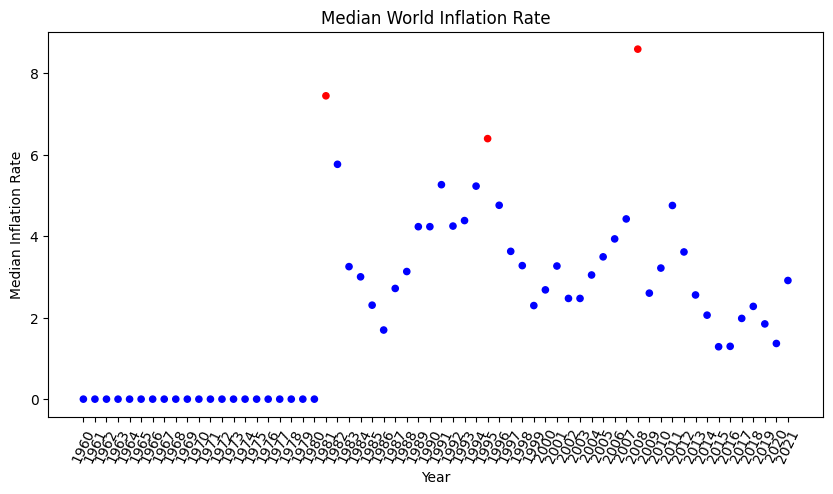

In [224]:
# plot scatter plot of the data with colors based on colors column
ax = world_median_data.plot.scatter(x='year', 
                               y='median', 
                               c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                               figsize=(10, 5),
                               title='Median World Inflation Rate',
                               xlabel='Year',
                               ylabel='Median Inflation Rate')

plt.xticks(rotation=65);

In [203]:
colunas = []
for i in data.columns[2:].to_list():
    i = i[:-9]
    colunas.append(i)

In [225]:
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(world_median_data[['year']], world_median_data[['median']])

LinearRegression()

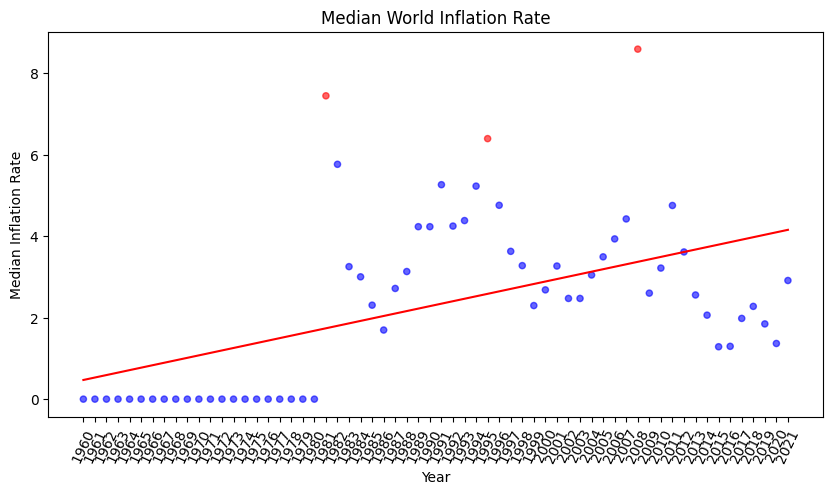

In [226]:
# How would a benchmark linear regression model perform?
ax = world_median_data.plot.scatter(x='year', y='median', 
                            c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                            alpha=.6, figsize=(10, 5),
                            title='Median World Inflation Rate',
                            xlabel='Year', ylabel='Median Inflation Rate')

reg_prediction = LinearRegression_model.predict(world_median_data[['year']])
ax.plot(world_median_data['year'], reg_prediction, c='r')
plt.xticks(rotation=65);

In [227]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(.05))

In [228]:
model_IF.fit(world_median_data[['median']])
world_median_data['IF_anomaly_scores'] = model_IF.decision_function(world_median_data[['median']])
world_median_data['IF_anomaly'] = model_IF.predict(world_median_data[['median']])
world_median_data.head()

,year,median,colors,IF_anomaly_scores,IF_anomaly
0,1960,0.0,b,0.147378,1
1,1961,0.0,b,0.147378,1
2,1962,0.0,b,0.147378,1
3,1963,0.0,b,0.147378,1
4,1964,0.0,b,0.147378,1


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


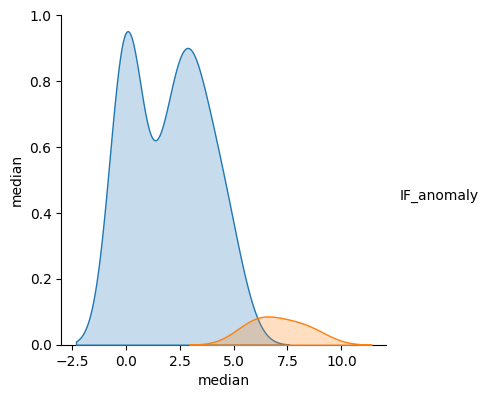

In [229]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(world_median_data, 
             vars=['median'], 
             hue='IF_anomaly', 
             palette=palette,
             height=4);

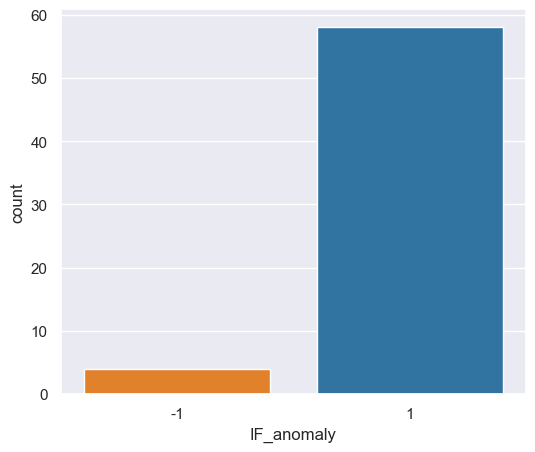

In [230]:
# phow many anomalies were detected by isolation forest?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='IF_anomaly', 
              data=world_median_data, 
              palette=palette);

In [231]:
from sklearn.neighbors import LocalOutlierFactor 

# note how predictions changes when we change the contamination and/or n_neighbors parameters
model_LOF = LocalOutlierFactor(n_neighbors=10)

In [232]:
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

LOF_predictions = model_LOF.fit_predict(world_median_data[['median']])
n_errors = (LOF_predictions != 1).sum()
model_LOF_scores = model_LOF.negative_outlier_factor_

In [233]:
world_median_data['LOF_anomaly_scores'] = model_LOF_scores
world_median_data['LOF_anomaly'] = LOF_predictions
world_median_data.describe()

,median,IF_anomaly_scores,IF_anomaly,LOF_anomaly_scores,LOF_anomaly
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.311371,0.126734,0.870968,-1.142545,0.806452
std,2.113783,0.062925,0.495351,0.364640,0.596127
min,0.000000,-0.145437,-1.000000,-3.208561,-1.000000
25%,0.000000,0.118945,1.000000,-1.133198,1.000000
50%,2.387500,0.147378,1.000000,-1.003119,1.000000
75%,3.580000,0.157285,1.000000,-1.000000,1.000000
max,8.585000,0.187316,1.000000,-0.932729,1.000000


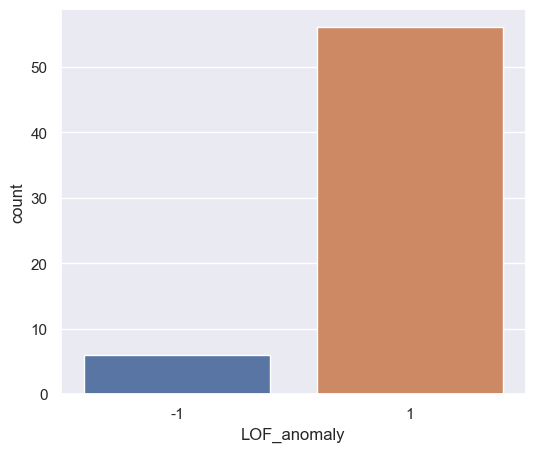

In [234]:
# phow many anomalies were detected by Local Outlier Factor?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='LOF_anomaly', 
              data=world_median_data);

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_20272\3006174028.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python3

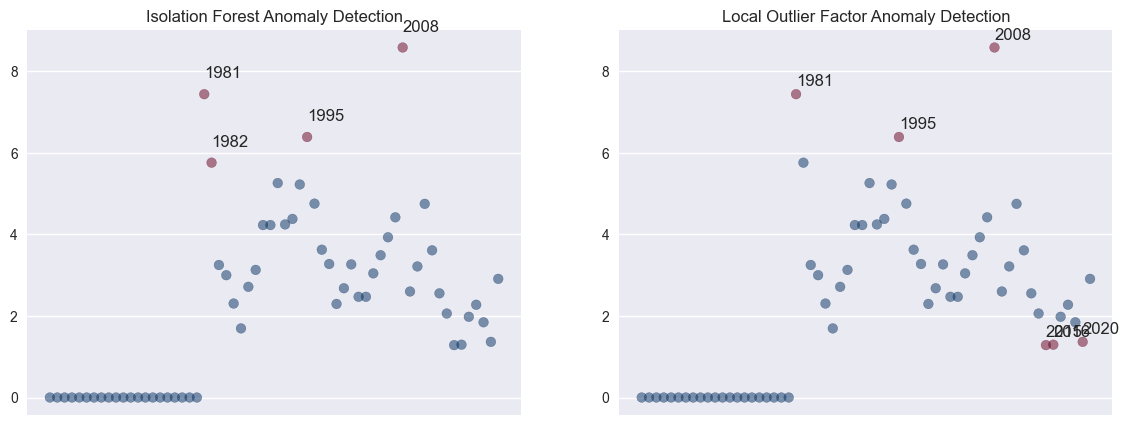

In [235]:
plt.style.use("seaborn")

# Plot two scatterplots coloring by the two different anomaly predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=False)

ax1.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['IF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax1.set_title("Isolation Forest Anomaly Detection")

# label anomalies in ax1 with year value
for anomaly in world_median_data[world_median_data['IF_anomaly'] == -1]['year']:
    ax1.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.4))

ax2.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['LOF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in world_median_data[world_median_data['LOF_anomaly'] == -1]['year']:
    ax2.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.2))

# hide x axis labels from axes
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)